# Problem Statement


1.   We have the dataset(housing data multiple dimensions where we have to predict the house.




## Approach


1.   Load the data
2.   Exploratory data analysis (EDA)
3.   Pre-processing data (Filling missing values etc)
4.   Modelling
5.   Prediction



### Importing Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


 ### Load the dataset using pandas

In [ ]:
house_df = pd.read_csv("house.csv")

In [ ]:
# let's view the top five data to understand about the data
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# let's view the least five data to understand about the data
house_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [ ]:
house_df.shape

(20640, 10)

##### In our dataset There are totally 20640 rows and 10 columns are there

## EDA (Exploratory Data Analysis)



1.   In EDA We observe the data and understand about the dataset.

*   observe the metrics and dimentions  
*   observe whethere the dataset contain null values or not
*   observe whether the dataset contain duplicates or not
*   observe the datatypes of the each features




In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### From the above observation we can see the basic information about the data set 


In [ ]:
# let's view the aggregated info about the numerical features
house_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### From the above observation we can see

*   count
*   mean
*   standared deviation
*   minimum
* maximum
*percentile value

#### of each metrics in our dataset




## Identifying any missing data

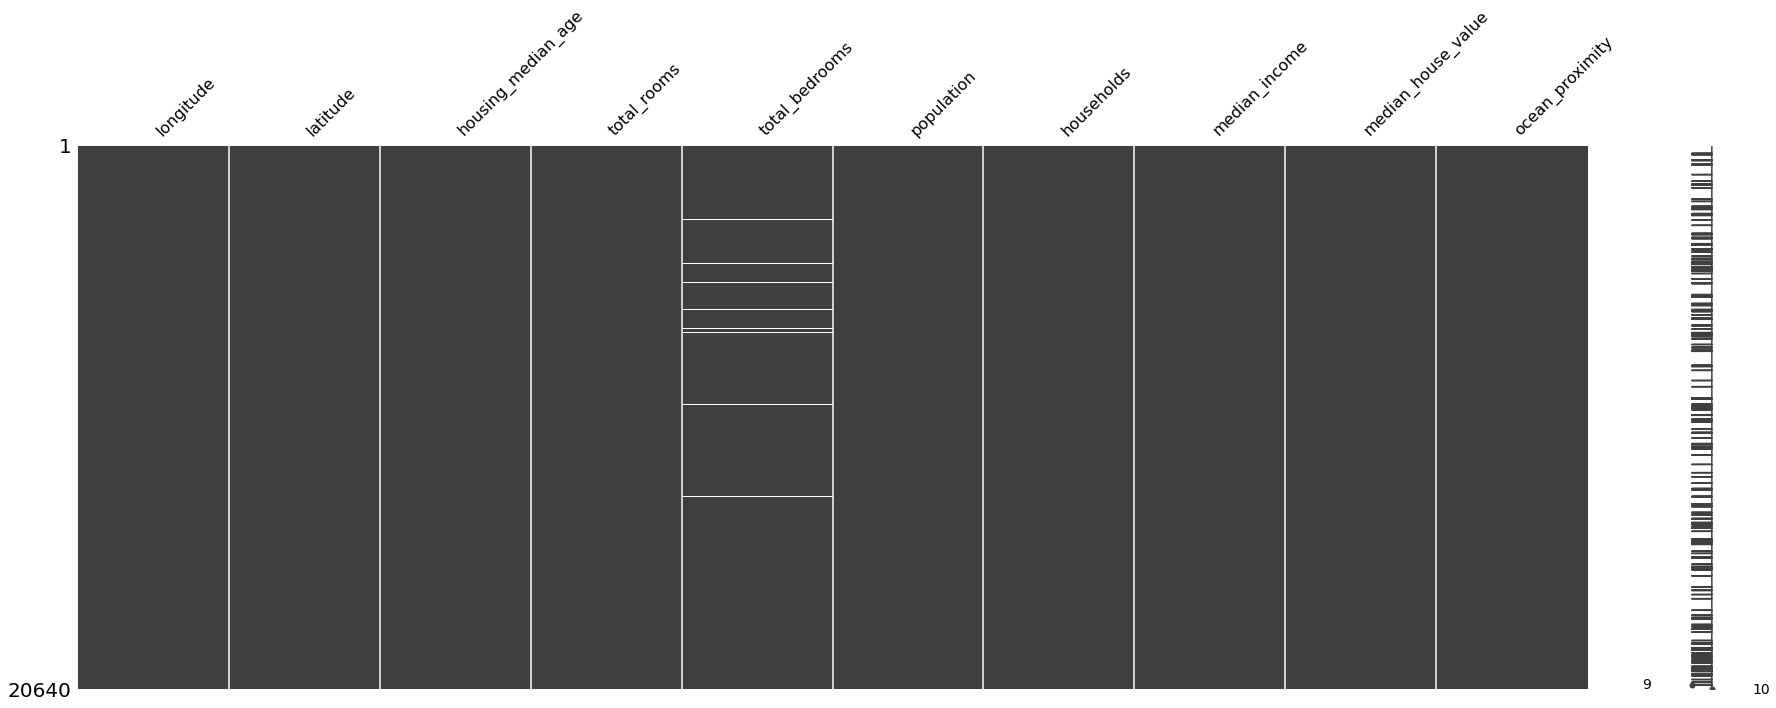

In [ ]:
#plot the graph of missing value
missingno.matrix(house_df, figsize = (30,10),color = (0.25,0.25,0.25))

In [ ]:
# we can also see the null values using pandas 
house_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Fom the above observation we can see there is only one feature total bedrooms contains null values

In [ ]:
# By seeing the correlation we can able to understand the relationship between the features
house_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


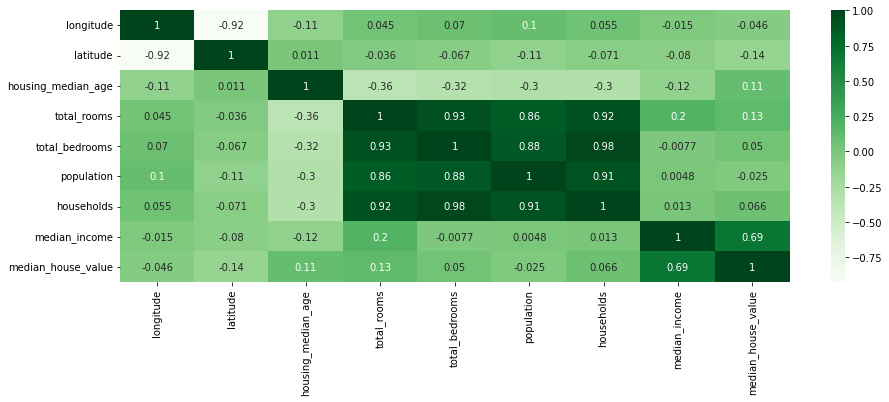

In [ ]:
# let's plot the corelation using heatmap
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(house_df.corr(),annot=True,cmap="Greens")

From here we can see there is a good correlation between total_bedrooms and household

# Feature Engineering
Feature engineering or feature extraction or feature discovery is the process of using domain knowledge to extract features (characteristics, properties, attributes) from raw data.[1] The motivation is to use these extra features to improve the quality of results from a machine learning process, compared with supplying only the raw data to the machine learning process.

## Handling Null values

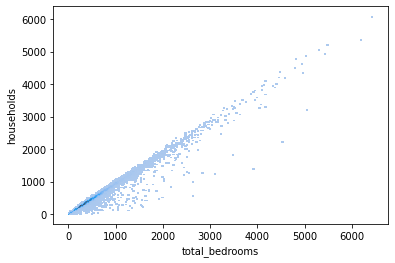

In [ ]:
sns.histplot(x = house_df["total_bedrooms"],y = house_df["households"],)


#####   so we can see the linear relation between total_bedrooms and households hence we can predict the missing total_bedrooms with households using linear regression





In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
missing_test_df = house_df[house_df["total_bedrooms"].isnull()]

In [ ]:
missing_train_df = house_df[house_df["total_bedrooms"].notnull()]

In [ ]:
X_train = missing_train_df["households"]
Y_train =  missing_train_df["total_bedrooms"]
X_test = missing_test_df["households"]
Y_test = missing_test_df["total_bedrooms"]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train.values.reshape(-1, 1),Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test.values.reshape(-1,1))

In [ ]:
missing_test_df["total_bedrooms"] = Y_pred

<ipython-input-94-bd310f1daf54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_test_df["total_bedrooms"] = Y_pred


In [ ]:
missing_test_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
processed_df = pd.concat([missing_train_df,missing_test_df])

In [ ]:
processed_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


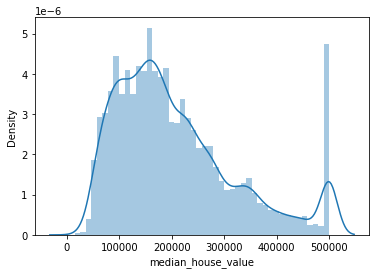

In [ ]:
sns.distplot(processed_df['median_house_value'])

In [ ]:
processed_df[processed_df["median_house_value"]==500000].count()

longitude             27
latitude              27
housing_median_age    27
total_rooms           27
total_bedrooms        27
population            27
households            27
median_income         27
median_house_value    27
ocean_proximity       27
dtype: int64

## Encoding

### In our dataset there is only one categorical feauture is there so we have to encode that in order to convert that into numerical value because our machine will not understand categorical values

####    There are two categories when it's come to encoding 

       1. Nominal Encoding 
       2. Ordinal Encoding

####    our category comes under Nominal and also there is only 5 categories are there so we can use the one hot encoding to encode the data

In [ ]:
processed_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
encoded_df = pd.get_dummies(processed_df,columns = ["ocean_proximity"])

In [ ]:
encoded_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.000000,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.000000,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.000000,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.000000,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.000000,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,839.772941,3171.0,779.0,3.3409,220500.0,0,0,0,0,1
20268,-119.18,34.19,19.0,2393.0,821.414733,1938.0,762.0,1.6953,167400.0,0,0,0,0,1
20372,-118.88,34.17,15.0,4260.0,720.984536,1701.0,669.0,5.1033,410700.0,1,0,0,0,0
20460,-118.75,34.29,17.0,5512.0,877.569252,2734.0,814.0,6.6073,258100.0,1,0,0,0,0


# Model Creation


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
independent_column= ["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","ocean_proximity_<1H OCEAN","ocean_proximity_INLAND","ocean_proximity_ISLAND","ocean_proximity_NEAR BAY","ocean_proximity_NEAR OCEAN"]
dependent_column = ["median_house_value"]

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(encoded_df[independent_column],encoded_df[dependent_column],test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [ ]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train,Y_train)


LinearRegression()

In [ ]:
Y_pred = linear_regression_model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score


In [ ]:
math.sqrt(mean_squared_error(Y_test,Y_pred))

68552.2865054353

In [ ]:
r2_score(Y_test,Y_pred)

0.6483851797363454

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train,Y_train)
decision_tree_y_pred = decision_tree_model.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(Y_test,decision_tree_y_pred))

67900.62437806059

In [ ]:
r2_score(Y_test,decision_tree_y_pred)

0.6550383489413514

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train,Y_train)
random_forest_pred = random_forest_model.predict(X_test)

<ipython-input-137-de20dc838232>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train,Y_train)


In [ ]:
math.sqrt(mean_squared_error(Y_test,random_forest_pred))

49715.25052403236

In [ ]:
r2_score(Y_test,random_forest_pred)

0.815072053728653

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_boost_model = AdaBoostRegressor()
ada_boost_model.fit(X_train,Y_train)
ada_boost_pred = ada_boost_model.predict(X_test)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
math.sqrt(mean_squared_error(Y_test,ada_boost_pred))

87389.87256188574

In [ ]:
r2_score(Y_test,ada_boost_pred)

0.42859308185111866

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost_model = GradientBoostingRegressor()
gradient_boost_model.fit(X_train,Y_train)
grad_boost_pred = gradient_boost_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
math.sqrt(mean_squared_error(Y_test,grad_boost_pred))

55561.17965380022

In [ ]:
r2_score(Y_test,grad_boost_pred)

0.7690243499766388

# Conclusion

        among the five algorithms we applied above random forest model perform better with the 81 r2_score and smse 49715
        